In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt


In [9]:
# Define paths
train_dir = r"C:\Users\asus\Desktop\MiniProject4\dataset\train"
validation_dir = r"C:\Users\asus\Desktop\MiniProject4\dataset\validation"

# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=20, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(128, 128), batch_size=32, class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir, target_size=(128, 128), batch_size=32, class_mode='categorical')


Found 2040 images belonging to 3 classes.
Found 297 images belonging to 3 classes.


In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 categories: bette, gotu, kole
])


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

def lr_scheduler(epoch, lr):
    return lr * 0.95

callbacks = [early_stopping, LearningRateScheduler(lr_scheduler)]


In [13]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=callbacks
)


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.4900 - loss: 2.9234 - val_accuracy: 0.2391 - val_loss: 15.6323 - learning_rate: 9.5000e-04
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.5866 - loss: 0.9379 - val_accuracy: 0.2828 - val_loss: 11.1138 - learning_rate: 9.0250e-04
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.6258 - loss: 0.8407 - val_accuracy: 0.3939 - val_loss: 15.3711 - learning_rate: 8.5737e-04
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.6987 - loss: 0.7154 - val_accuracy: 0.3939 - val_loss: 9.7143 - learning_rate: 8.1451e-04
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.7102 - loss: 0.7200 - val_accuracy: 0.4007 - val_loss: 12.3044 - learning_rate: 7.7378e-04
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.7522 - loss: 0.6207 - val_accuracy: 0.4175 - val_loss: 6.4705 - learning_rate: 7.3509e-04
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.7

In [14]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print(f"Test Accuracy: {test_acc:.2f}")

# Save the model
model.save('./arecanut_cnn_model.h5')



10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6215 - loss: 1.7682


Test Accuracy: 0.62


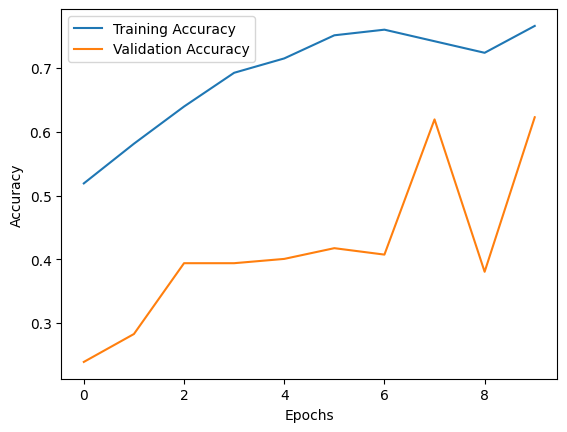

In [15]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess a new image
img_path = r'C:\Users\asus\Desktop\MiniProject4\dataset\test\image4.jpg'
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class
predictions = model.predict(img_array)
class_indices = train_generator.class_indices
categories = {v: k for k, v in class_indices.items()}

# Print predictions
for category, score in zip(categories.values(), predictions[0]):
    print(f"{category}: {score:.2%}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Good Quality: 17.74%
Kari Gotu: 70.26%
Ulli: 12.00%


In [17]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(img):
    # Preprocess the image for model input
    img = img.resize((224, 224))  # Resize image to the input size expected by the model
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize if needed

    # Load the model (make sure you load the correct model file)
    model = tf.keras.models.load_model('arecanut_cnn_model.h5')

    # Make prediction
    prediction = model.predict(img_array)
    # Assuming prediction returns probabilities for each class
    return {'Class 1': prediction[0][0], 'Class 2': prediction[0][1]}  # Adjust based on model output
